In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [21]:
# df = pd.read_csv ("../data/mobile.csv")
# df

df = pd.read_csv("../data/Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Survived
0    549
1    342
Name: count, dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

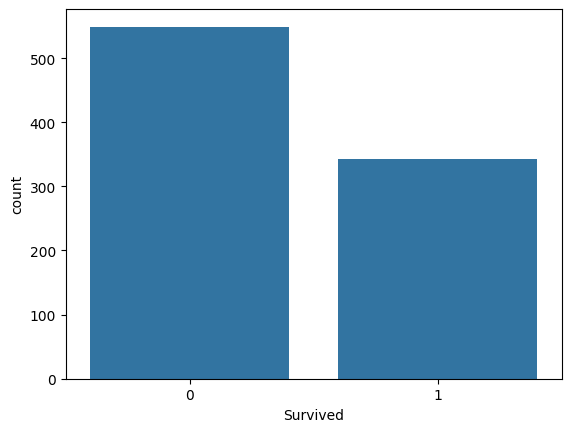

In [23]:
print (df['Survived'].value_counts())
sns.countplot(data=df, x='Survived')

In [24]:
print (df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [25]:
df = df.drop(columns = ['Name'])
df = df.drop(columns = ['Ticket'])
df = df.drop(columns = ['Cabin'])
df = df.drop(columns = ['Embarked'])
print (df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')


In [26]:
print (df.isnull().sum())
df['Age'] = df['Age'].fillna(df.mean)
print (df.isnull().sum() )

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


In [27]:
for name in df.columns : 
    print (f"{name} : ", df[name].dtype)

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['Sex'] = LE.fit_transform(df['Sex'])

col_idx = 4 
df.iloc[:, col_idx] = pd.to_numeric(df.iloc[:, col_idx], errors='coerce') 
df.iloc[:, col_idx].fillna(df.iloc[:, col_idx].median(), inplace=True)  
df.iloc[:, col_idx] = df.iloc[:, col_idx].astype(int)  

PassengerId :  int64
Survived :  int64
Pclass :  int64
Sex :  object
Age :  object
SibSp :  int64
Parch :  int64
Fare :  float64


/var/folders/_z/gryfr07n59jgb3wrd062h1ym0000gn/T/ipykernel_77977/362890755.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.iloc[:, col_idx].fillna(df.iloc[:, col_idx].median(), inplace=True)
/var/folders/_z/gryfr07n59jgb3wrd062h1ym0000gn/T/ipykernel_77977/362890755.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

In [28]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X.shape, y.shape

((891, 7), (891,))

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y)

display(X_train.head(5))
display(y_train.head(5))
display(X_test.head(5))
display(y_test.head(5))

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print (y_train)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
86,87,3,1,16.0,1,3,34.3750
780,781,3,0,13.0,0,0,7.2292
612,613,3,0,28.0,1,0,15.5000
387,388,2,0,36.0,0,0,13.0000
293,294,3,0,24.0,0,0,8.8500


86     0
780    1
612    1
387    1
293    0
Name: Survived, dtype: int64

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
220,221,3,1,16.0,0,0,8.0500
192,193,3,0,19.0,1,0,7.8542
118,119,1,1,24.0,0,1,247.5208
299,300,1,0,50.0,0,1,247.5208
693,694,3,1,25.0,0,0,7.2250


220    1
192    1
118    0
299    1
693    0
Name: Survived, dtype: int64

(712, 7) (179, 7) (712,) (179,)
86     0
780    1
612    1
387    1
293    0
      ..
197    0
168    0
715    0
138    0
349    0
Name: Survived, Length: 712, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.86      0.81      0.84       117
           1       0.68      0.76      0.72        62

    accuracy                           0.79       179
   macro avg       0.77      0.79      0.78       179
weighted avg       0.80      0.79      0.80       179

accuracy :  0.7932960893854749
f1_score :  0.7175572519083969
recall :  0.7580645161290323
precision :  0.6811594202898551
[[95 15]
 [22 47]]


<Axes: >

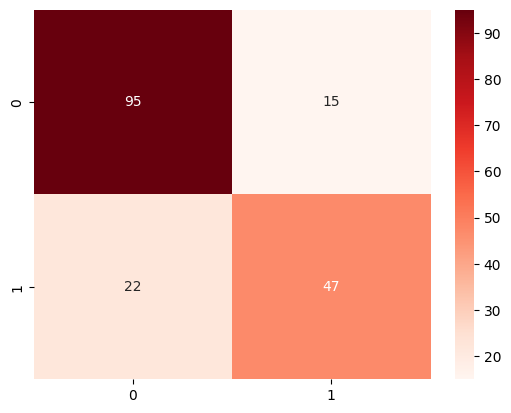

In [49]:
# LR

from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict (X_test)

print (classification_report(y_pred, y_test))

print ("accuracy : ", accuracy_score(y_pred, y_test))
print ("f1_score : ", f1_score(y_pred, y_test))
print ("recall : ", recall_score(y_pred, y_test))
print ("precision : ", precision_score(y_pred, y_test))

cm = confusion_matrix(y_test, y_pred)
print (cm)
sns.heatmap(cm, annot=True, cmap='Reds')

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       106
           1       0.64      0.60      0.62        73

    accuracy                           0.70       179
   macro avg       0.69      0.68      0.68       179
weighted avg       0.70      0.70      0.70       179

accuracy :  0.6983240223463687
f1_score :  0.6197183098591549
recall :  0.6027397260273972
precision :  0.6376811594202898
[[81 29]
 [25 44]]


<Axes: >

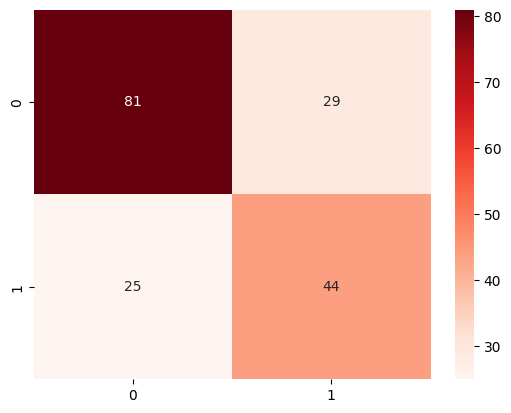

In [51]:
# DT

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict (X_test)

print (classification_report(y_pred, y_test))

print ("accuracy : ", accuracy_score(y_pred, y_test))
print ("f1_score : ", f1_score(y_pred, y_test))
print ("recall : ", recall_score(y_pred, y_test))
print ("precision : ", precision_score(y_pred, y_test))

cm = confusion_matrix(y_test, y_pred)
print (cm)
sns.heatmap(cm, annot=True, cmap='Reds')

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       112
           1       0.75      0.78      0.76        67

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

accuracy :  0.8212290502793296
f1_score :  0.7647058823529411
recall :  0.7761194029850746
precision :  0.7536231884057971
[0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1]
220    1
192    1
118    0
299    1
693    0
401    0
526    1
828    1
809    1
882    0
275    1
885    0
421    0
222    0
82     1
410    0
565    0
685    0
701    1
698    0
Name: Survived, dtype: int64
[[95 15]
 [17 52]]


<Axes: >

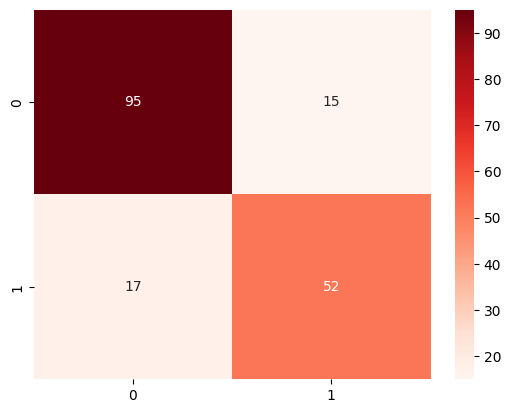

In [52]:
# RF

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict (X_test)

print (classification_report(y_pred, y_test))

print ("accuracy : ", accuracy_score(y_pred, y_test))
print ("f1_score : ", f1_score(y_pred, y_test))
print ("recall : ", recall_score(y_pred, y_test))
print ("precision : ", precision_score(y_pred, y_test))

print (y_pred[:20])
print (y_test[:20])

cm = confusion_matrix(y_test, y_pred)
print (cm)
sns.heatmap(cm, annot=True, cmap='Reds')

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       125
           1       0.42      0.54      0.47        54

    accuracy                           0.64       179
   macro avg       0.60      0.61      0.60       179
weighted avg       0.67      0.64      0.65       179

accuracy :  0.6368715083798883
f1_score :  0.4715447154471545
recall :  0.5370370370370371
precision :  0.42028985507246375
[[85 25]
 [40 29]]


<Axes: >

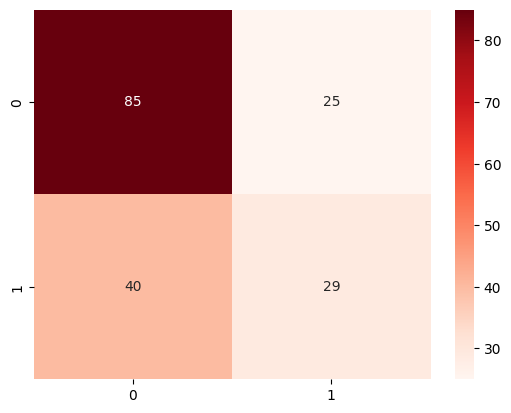

In [53]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict (X_test)

print (classification_report(y_pred, y_test))

print ("accuracy : ", accuracy_score(y_pred, y_test))
print ("f1_score : ", f1_score(y_pred, y_test))
print ("recall : ", recall_score(y_pred, y_test))
print ("precision : ", precision_score(y_pred, y_test))

cm = confusion_matrix(y_test, y_pred)
print (cm)
sns.heatmap(cm, annot=True, cmap='Reds')

([<matplotlib.axis.XTick at 0x12fa06f10>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39'),
  Text(40, 0, '40'),
  Text(41, 0, '41'),
  Text(42, 0, '42'),
  Text(43, 0, '43'),
  Text(44, 0, '44'),
  Text(45, 0, '45'),
  Text(46, 0, '46'),
  Text(47,

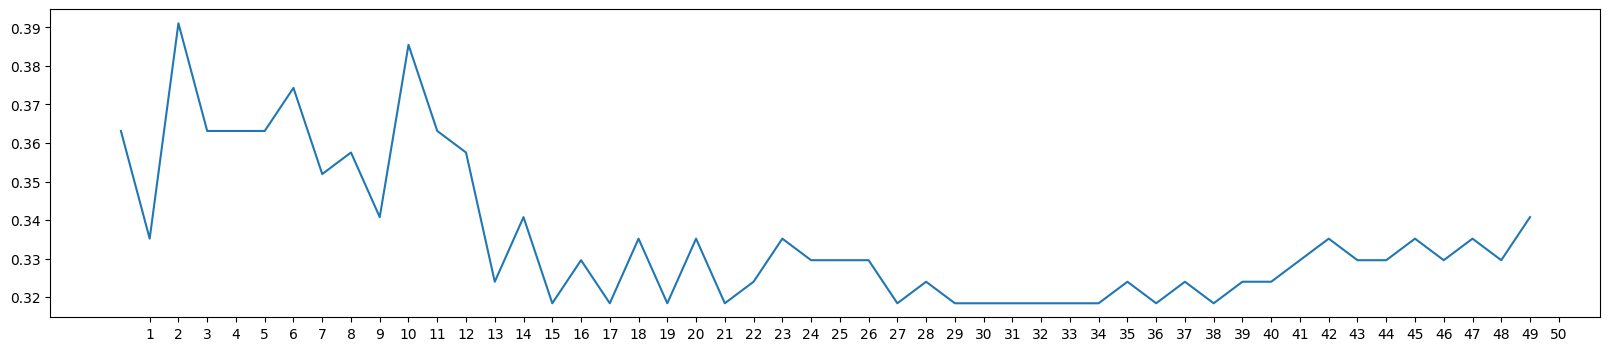

In [34]:
# KNN with finding elbow

from sklearn.metrics import accuracy_score

scores = []

for K in range (50) : 
    model = KNeighborsClassifier(n_neighbors=K+1)
    model.fit (X_train, y_train)
    y_pred = model.predict (X_test)
    scores.append (1-accuracy_score(y_test, y_pred))
    
plt.figure(figsize=(20, 4))
plt.plot (scores)
plt.xticks([i for i in range (1, 51)])


In [35]:
model = KNeighborsClassifier(n_neighbors=21)
model.fit (X_train, y_train)
y_pred = model.predict (X_test)
print (accuracy_score(y_test, y_pred))

0.664804469273743


              precision    recall  f1-score   support

           0       0.96      0.65      0.78       163
           1       0.17      0.75      0.28        16

    accuracy                           0.66       179
   macro avg       0.57      0.70      0.53       179
weighted avg       0.89      0.66      0.73       179

accuracy :  0.659217877094972
f1_score :  0.2823529411764706
recall :  0.75
precision :  0.17391304347826086
[[106   4]
 [ 57  12]]


<Axes: >

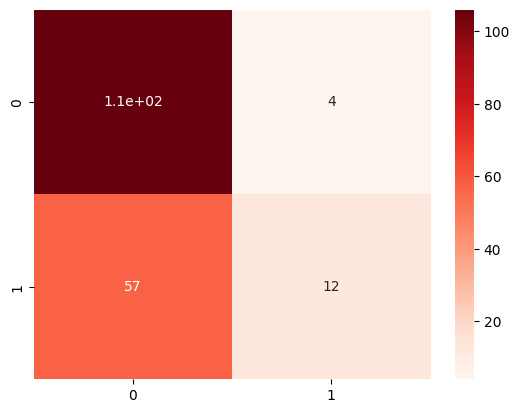

In [54]:
# SVM

from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict (X_test)

print (classification_report(y_pred, y_test))

print ("accuracy : ", accuracy_score(y_pred, y_test))
print ("f1_score : ", f1_score(y_pred, y_test))
print ("recall : ", recall_score(y_pred, y_test))
print ("precision : ", precision_score(y_pred, y_test))

cm = confusion_matrix(y_test, y_pred)
print (cm)
sns.heatmap(cm, annot=True, cmap='Reds')